In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import mglearn
style.use("ggplot")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<hr/>
### Representing Data and Engineering Features

#### Categorical Data
1. One-Hot-Encoding (Dummy Variables)

Dummy Varibles is quite straight-forward, for n features, different samples have different features. We can specify the feature that the samples embeded as 1, none as 0.
<br>
<b>Note</b>: Dummy variables in machine learning differ from the statistics. In the later field, we denotes the dummy variable in the number ranged from 0 to n-1, n is the numbers of features. Why we should encode the dummy  variable in 0 and 1? <b>To avoid data matrix rank deficient.</b>
<br>
#### Example: Adult data 
"data" used to demonstrate

In [7]:
data = pd.read_csv("C:\\Users\\Huang\\Desktop\\Books\\data\\adult.data",\
                  header = None, index_col = False, \
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])
data = data[['age', 'workclass', 'education', 'gender',\
             'hours-per-week','occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


<b>Check the Na Values</b>

In [8]:
print data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [10]:
data.shape[0] == data.gender.value_counts().sum()

True

<b>Look the data.colums before and after the <em>"pd.get_dummies()"</em>

In [12]:
print data.columns

Index([u'age', u'workclass', u'education', u'gender', u'hours-per-week',
       u'occupation', u'income'],
      dtype='object')


In [14]:
print pd.get_dummies(data).columns

Index([u'age', u'hours-per-week', u'workclass_ ?', u'workclass_ Federal-gov',
       u'workclass_ Local-gov', u'workclass_ Never-worked',
       u'workclass_ Private', u'workclass_ Self-emp-inc',
       u'workclass_ Self-emp-not-inc', u'workclass_ State-gov',
       u'workclass_ Without-pay', u'education_ 10th', u'education_ 11th',
       u'education_ 12th', u'education_ 1st-4th', u'education_ 5th-6th',
       u'education_ 7th-8th', u'education_ 9th', u'education_ Assoc-acdm',
       u'education_ Assoc-voc', u'education_ Bachelors',
       u'education_ Doctorate', u'education_ HS-grad', u'education_ Masters',
       u'education_ Preschool', u'education_ Prof-school',
       u'education_ Some-college', u'gender_ Female', u'gender_ Male',
       u'occupation_ ?', u'occupation_ Adm-clerical',
       u'occupation_ Armed-Forces', u'occupation_ Craft-repair',
       u'occupation_ Exec-managerial', u'occupation_ Farming-fishing',
       u'occupation_ Handlers-cleaners', u'occupation_ Machine-

In [16]:
data_dummies = pd.get_dummies(data)
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Extracting features

In [29]:
features = data_dummies.ix[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print "X.shape: {} y.shape: {}".format(X.shape, y.shape) 

X.shape: (32561L, 44L) y.shape: (32561L,)


#### Training a model uses Logistic Regression

#### Except tree-based methods, all of the others shold use scaling. Two reasons: Convergence faster and distance metrics

#### In any linear generated models, if regularization applied, scaling and centering should must be done.

In the example below, because features are already located in [0, 1], so every scaler performs the same result.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lg = LogisticRegression().fit(X_train, y_train)

print "Accuracy on the training dataset: {:.3f}".format(lg.score(X_train, y_train))
print "Accuracy on the testing dataset: {:.3f}".format(lg.score(X_test, y_test))

Accuracy on the training dataset: 0.814
Accuracy on the testing dataset: 0.809


<hr/>
### Binning, Discretization, Linear Models, and Trees

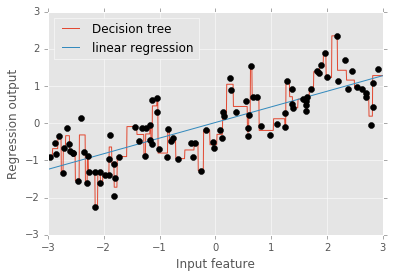

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "Decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label = "linear regression")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")

In [44]:
bins = np.linspace(-3, 3, 11) ## X_max = 2.9, X_min = -2.9
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [49]:
which_bin = np.digitize(X, bins)

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


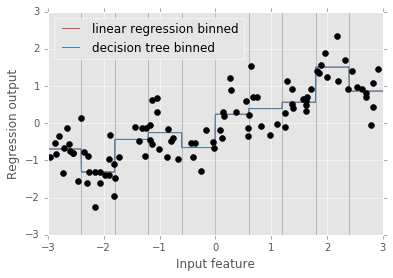

In [51]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

Though bins is relatively powerful in linear regression, tree based methods seems more powerful than linear models. If there are some reasons we must used linear regression, then it will be <b>large datasize</b> and <b>tremendous features</b>. Besides, <b>expannation demands</b> also could be an alternative.

<hr/>
#### Interactions and Polynomials
Used in lenear models.

<hr/>
#### Automatic model selection
+ Univariate statistics
+ Model based selection
+ Iterative selection

#### Univariate Statistics
In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confidence are selected. In the case of classification, this is also known as analysis of variance (ANOVA). A key property of these tests is that they are univariate, meaning that they only consider each feature individually. Consequently, a feature will be discarded if it is only informative when combined with another feature. Univariate tests are often very fast to compute, and don’t require building a model. On the other hand, they are completely independent of the model that you might want to apply after the feature selection.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = 0.5)
select = SelectPercentile(percentile = 50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print "X_train shape is: {}".format(X_train.shape)
print "X_train_selected shape is: {}".format(X_train_selected.shape)

X_train shape is: (284L, 80L)
X_train_selected shape is: (284L, 40L)


In [17]:
mask = select.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False], dtype=bool)

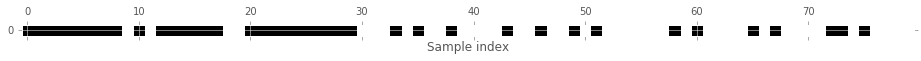

In [19]:
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample index")

In [ ]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))

In [21]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)
lr = LogisticRegression()

lr.fit(X_train, y_train)
print "Score with all features: {:.3f}".format(lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
print "Score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test))

Score with all features: 0.930
Score with selected features: 0.940


<hr/>
#### Model-Based Feature Selection
+ Tree based models: <b><em>feature\_importances\_</em></b>
+ Linear models: <b><em>coefficients</em></b>
<p> Compared to Univariate statistics method, tree-based features selection evaluated all features at once and the interactions were considered as well.</p>

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = "median")
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print "X_train_selected shape: {}".format(X_train_selected.shape)
print "X_train shape: {}".format(X_train.shape)

X_train_selected shape: (284L, 40L)
X_train shape: (284L, 80L)


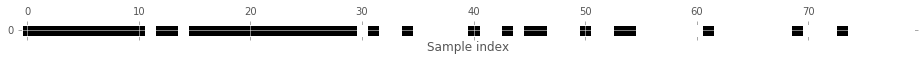

In [27]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample index")

In [31]:
X_test_selected = select.transform(X_test)

print "Accuracy of train dataset: {:.3f}".format(lr.fit(X_train, y_train).score(X_train, y_train))
print "Accuracy of test dataset: {:.3f}".format(lr.fit(X_train, y_train).score(X_test, y_test))
print "\n"
print "Accuracy of selected dataset: {:.3f}".format(lr.fit(X_train_selected, y_train).score(X_train_selected, y_train))
print "Accuracy of selected dataset: {:.3f}".format(lr.fit(X_train_selected, y_train).score(X_test_selected, y_test))

Accuracy of train dataset: 1.000
Accuracy of test dataset: 0.930


Accuracy of selected dataset: 0.972
Accuracy of selected dataset: 0.951


<hr/>
#### Iterative Feature Selection
<p>There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached.</p>
<p>recursive feature elimination (RFE):starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left.</p>
<p><b>It is very time consuming.</b></p>

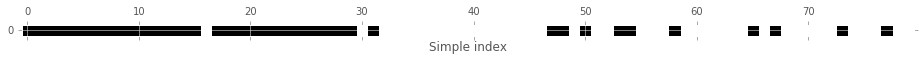

In [38]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 40)
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = "gray_r")
plt.xlabel("Simple index")

In [39]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score))

Test score: 0.951


#### Utilizing Expert Knowledge
In some specific scenario, humankind is better than machine.

### Summary
1. One-Hot Enoding
2. Feature Enginerring